# ①	在实验二前复权实验的基础上，计算macd指标公式，参考以下指标实现

In [57]:
import pandas as pd
import tushare as ts

#定义一个函数get_a_share
def macd():
    def get_a_share(code):
    #使用tushare的get_k_data调用A股股票数据
        data = ts.get_k_data(code,start='2017-01-01', end='2017-12-31')
        #删除列code
        data = data.drop('code',axis = 1)
        #返回修改后的股票数据
        return data
        #定义函数，获取macd,导入数据，初始化三个参数

    def get_macd_data(data,short=0,long=0,mid=0):
        if short==0:
            short=12
        if long==0:
            long=26
        if mid==0:
            mid=9
        #计算短期的ema，使用pandas的ewm得到指数加权的方法，mean方法指定数据用于平均
        data['sema']=pd.Series(data['close']).ewm(span=short).mean()
        #计算长期的ema，方式同上
        data['lema']=pd.Series(data['close']).ewm(span=long).mean()
        #填充为na的数据
        data.fillna(0,inplace=True)
        #计算dif，加入新列data_dif
        data['data_dif']=data['sema']-data['lema']
        #计算dea
        data['data_dea']=pd.Series(data['data_dif']).ewm(span=mid).mean()
        #计算macd
        data['data_macd']=2*(data['data_dif']-data['data_dea'])
        #填充为na的数据
        data.fillna(0,inplace=True)
        #返回data的三个新列
        return data[['date','data_dif','data_dea','data_macd']]

    code = '000012'
    data = get_a_share(code)
    macd = get_macd_data(data)
    print (macd)
    return list(macd['date']),list(macd['data_macd'])
macd()

           date  data_dif  data_dea  data_macd
0    2017-01-03  0.000000  0.000000   0.000000
1    2017-01-04  0.002333  0.001296   0.002074
2    2017-01-05  0.004338  0.002543   0.003590
3    2017-01-06 -0.000742  0.001430  -0.004344
4    2017-01-09 -0.002015  0.000405  -0.004840
5    2017-01-10  0.008376  0.002566   0.011621
6    2017-01-11  0.019245  0.006787   0.024916
7    2017-01-12  0.018851  0.009686   0.018330
8    2017-01-13  0.028214  0.013966   0.028496
9    2017-01-16  0.012657  0.013673  -0.002031
10   2017-01-17 -0.005901  0.009390  -0.030582
11   2017-01-18 -0.023052  0.002423  -0.050950
12   2017-01-19 -0.036765 -0.005870  -0.061789
13   2017-01-20 -0.043074 -0.013653  -0.058842
14   2017-01-23 -0.035830 -0.018250  -0.035159
15   2017-01-24 -0.035281 -0.021755  -0.027051
16   2017-01-25 -0.035352 -0.024537  -0.021630
17   2017-01-26 -0.031694 -0.025995  -0.011399
18   2017-02-03 -0.027087 -0.026216  -0.001740
19   2017-02-06 -0.021774 -0.025318   0.007087
20   2017-02-

(['2017-01-03',
  '2017-01-04',
  '2017-01-05',
  '2017-01-06',
  '2017-01-09',
  '2017-01-10',
  '2017-01-11',
  '2017-01-12',
  '2017-01-13',
  '2017-01-16',
  '2017-01-17',
  '2017-01-18',
  '2017-01-19',
  '2017-01-20',
  '2017-01-23',
  '2017-01-24',
  '2017-01-25',
  '2017-01-26',
  '2017-02-03',
  '2017-02-06',
  '2017-02-07',
  '2017-02-08',
  '2017-02-09',
  '2017-02-10',
  '2017-02-13',
  '2017-02-14',
  '2017-02-15',
  '2017-02-16',
  '2017-02-17',
  '2017-02-20',
  '2017-02-21',
  '2017-02-22',
  '2017-02-23',
  '2017-02-24',
  '2017-02-27',
  '2017-02-28',
  '2017-03-01',
  '2017-03-02',
  '2017-03-03',
  '2017-03-06',
  '2017-03-07',
  '2017-03-08',
  '2017-03-09',
  '2017-03-10',
  '2017-03-13',
  '2017-03-14',
  '2017-03-15',
  '2017-03-16',
  '2017-03-17',
  '2017-03-20',
  '2017-03-21',
  '2017-03-22',
  '2017-03-23',
  '2017-03-24',
  '2017-03-27',
  '2017-03-28',
  '2017-03-29',
  '2017-03-30',
  '2017-03-31',
  '2017-04-05',
  '2017-04-06',
  '2017-04-07',
  '2017-

# 折线图

           date  data_dif  data_dea  data_macd
0    2017-01-03  0.000000  0.000000   0.000000
1    2017-01-04  0.002333  0.001296   0.002074
2    2017-01-05  0.004338  0.002543   0.003590
3    2017-01-06 -0.000742  0.001430  -0.004344
4    2017-01-09 -0.002015  0.000405  -0.004840
5    2017-01-10  0.008376  0.002566   0.011621
6    2017-01-11  0.019245  0.006787   0.024916
7    2017-01-12  0.018851  0.009686   0.018330
8    2017-01-13  0.028214  0.013966   0.028496
9    2017-01-16  0.012657  0.013673  -0.002031
10   2017-01-17 -0.005901  0.009390  -0.030582
11   2017-01-18 -0.023052  0.002423  -0.050950
12   2017-01-19 -0.036765 -0.005870  -0.061789
13   2017-01-20 -0.043074 -0.013653  -0.058842
14   2017-01-23 -0.035830 -0.018250  -0.035159
15   2017-01-24 -0.035281 -0.021755  -0.027051
16   2017-01-25 -0.035352 -0.024537  -0.021630
17   2017-01-26 -0.031694 -0.025995  -0.011399
18   2017-02-03 -0.027087 -0.026216  -0.001740
19   2017-02-06 -0.021774 -0.025318   0.007087
20   2017-02-

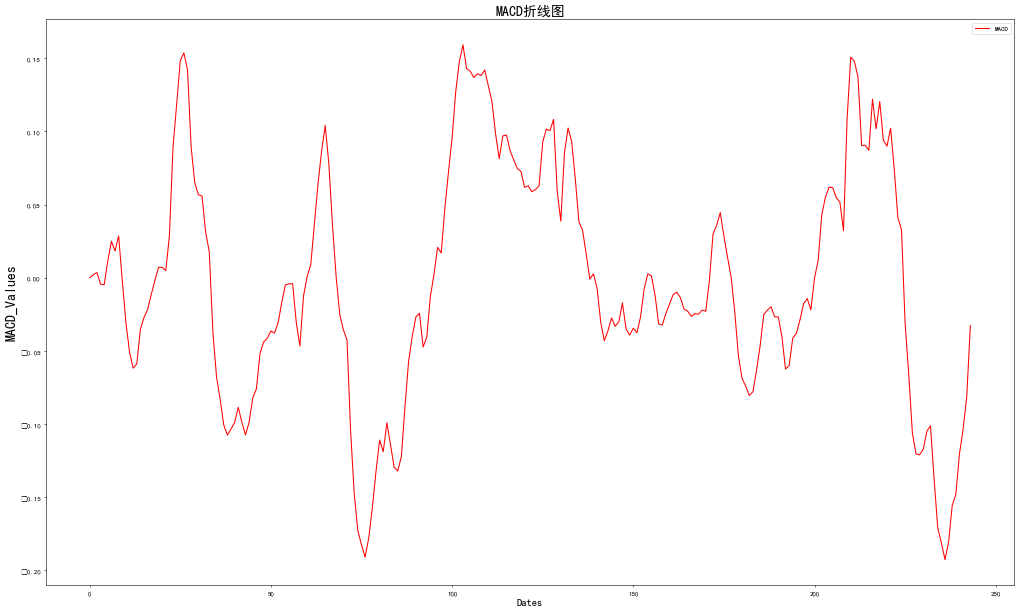

In [62]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import randn
plt.mpl.rcParams['font.sans-serif'] = ['SimHei']
date,macdval=macd()
plt.figure(figsize=(25,15), dpi=50, facecolor='w', edgecolor='k')
ax = plt.gca() 
plt.plot(macdval,color='red',label = 'MACD')
# date= date.reset_index()
# x=list(date.index)
# for i in range(len(x)):
#     if (i%10)==0:
#         continue
#     else:
#         x.remove(i)
# labels = date
# plt.xticks(x, labels, rotation = 'vertical')
plt.title('MACD折线图', fontsize=20)
plt.ylabel('MACD_Values', fontsize=20)
plt.xlabel('Dates', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.legend()
plt.show()